In [1]:
import pandas as pd
# 용량이 크니 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_oct = pd.read_csv("./drive/MyDrive/BDA(ML)/수)BDA_추천알고리즘/과제/dataset/2019-Oct.csv")
df_nov = pd.read_csv("./drive/MyDrive/BDA(ML)/수)BDA_추천알고리즘/과제/dataset/2019-Nov.csv")
df_dec = pd.read_csv("./drive/MyDrive/BDA(ML)/수)BDA_추천알고리즘/과제/dataset/2019-Dec.csv")

# 필수과제1.3
- 시간에 따른 인사이트 정리 필요 -> 시간에 따른 시각화와 인사이트 정리


In [9]:
def analyze_time_series(df, month_name):
    # 날짜를 기준으로 집계 (일별 이벤트 수)
    # 'event_time' 컬럼을 datetime으로 변환합니다.
    df['event_time'] = pd.to_datetime(df['event_time'])
    df['date'] = df['event_time'].dt.date  # 날짜만 추출
    daily_counts = df.groupby('date').size()  # 일별 이벤트 수 집계
    daily_counts.name = month_name  # 컬럼 이름 설정
    return daily_counts

In [10]:
# 각 월별 일별 이벤트 수 분석
oct_daily_counts = analyze_time_series(df_oct, 'October')
nov_daily_counts = analyze_time_series(df_nov, 'November')
dec_daily_counts = analyze_time_series(df_dec, 'December')

# 결과를 데이터프레임으로 합치기
daily_counts_df = pd.concat([oct_daily_counts, nov_daily_counts, dec_daily_counts], axis=1)
daily_counts_df.columns = ['October', 'November', 'December']

# 시각화
- 11월의 전반적 count가 높음
- 12월은 decreasing이 심한 편임
- 특히 11월 말에 소비가 폭증한 경향

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

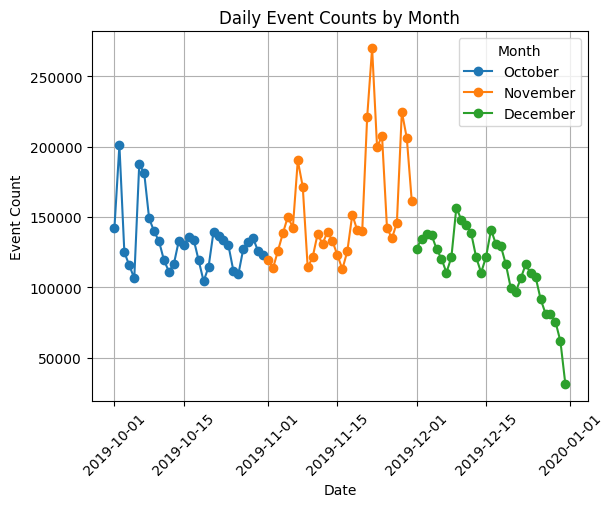

In [12]:
# 시각화
plt.figure(figsize=(12, 6))
daily_counts_df.plot(kind='line', marker='o')
plt.title('Daily Event Counts by Month')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.grid()
plt.show()

In [13]:
# 인사이트 정리
print(daily_counts_df)

             October  November  December
date                                    
2019-10-01  142414.0       NaN       NaN
2019-10-02  201068.0       NaN       NaN
2019-10-03  124847.0       NaN       NaN
2019-10-04  115612.0       NaN       NaN
2019-10-05  106343.0       NaN       NaN
...              ...       ...       ...
2019-12-27       NaN       NaN   81306.0
2019-12-28       NaN       NaN   81312.0
2019-12-29       NaN       NaN   75556.0
2019-12-30       NaN       NaN   61662.0
2019-12-31       NaN       NaN   31096.0

[92 rows x 3 columns]
